# Marginal 1-dim posteriors from image data

- Using SWYFT core functions (i.e. look at swyft/core.py)
- Demonstrates `head` network

Author: Christoph Weniger and Benjamin Miller, August 2020

In [12]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
DEVICE = 'cuda:0'
NDIM = 32 # number of parameters
NBINS = 1000

In [14]:
SIGMA = 0.05
def model(z):
    ring=np.array([0.5]*NDIM)
    x = sum((z[:2]-ring[:2])**2)  # radius squared
    x=x+sum((z[2:]-ring[2:])**2) # add height squared
    return np.array([x**0.5])

def noisemodel(x, z = None):
    n = np.random.randn(*x.shape)*SIGMA  #*noiselevel
    return x + n

In [15]:
z0=np.array([0.2,0.8]+[0.5]*int(NDIM-2))
x0 = noisemodel(model(z0))
x0

array([0.43567772])

In [18]:
ds = swyft.DataStoreZarr("/home/aecole/swyft/notebooks/SP.zarr")
ds.init(zdim = 32, xdim = (1,))

Creating empty datastore: /home/aecole/swyft/notebooks/SP.zarr
...don't forget to run `init` to set up storage parameters.
Datastore initialized.


In [19]:
sw_list = []

for i_round in range(6):
    parent = None if len(sw_list) == 0 else sw_list[-1]
    sw = swyft.SWYFT(x0, zdim = NDIM, device = DEVICE, head = None, datastore = ds, nsamples = 5000, noisemodel = noisemodel, parent = parent)
    sw_list.append(sw)
    
    if sw.requires_sim():
        for i in ds.require_sim():
            z = ds.z[i]
            x = model(z)
            ds.add_sim(i, x)
            
    sw.train1d(max_epochs = 100, nbatch = 16)

Constrained posterior area: 1.0
Adding 4912 new samples. Run simulator!
Start training
LR iteration 0
Total epochs: 11
Validation losses: [88.63745188713074, 88.54706501960754, 88.51196432113647, 88.50155663490295, 88.44011950492859, 88.41917896270752, 88.4205231666565, 88.38494348526001, 88.43052172660828, 88.40722298622131, 88.42163467407227]
LR iteration 1
Total epochs: 12
Validation losses: [88.37527751922607, 88.3690538406372, 88.3438401222229, 88.34717035293579, 88.35394406318665, 88.3383457660675, 88.3271894454956, 88.35060453414917, 88.31901836395264, 88.33280897140503, 88.33577251434326, 88.3335292339325]
LR iteration 2
Total epochs: 9
Validation losses: [88.3719232082367, 88.34057140350342, 88.33322262763977, 88.3299012184143, 88.33485817909241, 88.31792736053467, 88.33464050292969, 88.35272407531738, 88.33766317367554]
Constrained posterior area: 1.0
No new simulator runs required.
Start training
LR iteration 0
Total epochs: 15
Validation losses: [88.66181755065918, 88.61112

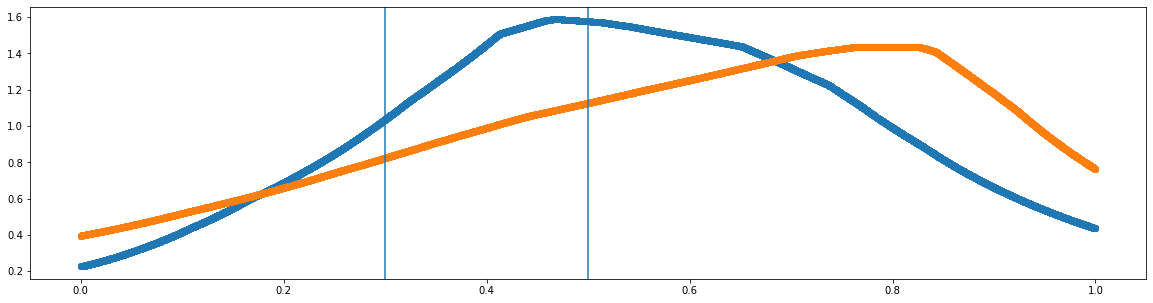

In [11]:
plt.figure(figsize=(20, 5))
for i in range(2):
    z, p = sw_list[-1].posterior(i)
    plt.axvline(z0[i])
    plt.scatter(z, p)

In [8]:
sw_list[-1].trainNd([[0, 1]], max_epochs = 100, nbatch = 16)

Start training
LR iteration 0
Total epochs: 6
Validation losses: [2.00803679227829, 1.8172152638435364, 1.7495269030332565, 1.755697287619114, 1.7768043000251055, 1.9247197322547436]
LR iteration 1
Total epochs: 4
Validation losses: [1.6264631040394306, 1.6493328660726547, 1.6875952258706093, 1.7023111712187529]
LR iteration 2
Total epochs: 8
Validation losses: [1.7225687243044376, 1.6589997075498104, 1.7514894027262926, 1.6985740512609482, 1.6220017783343792, 1.6507458202540874, 1.6738929823040962, 1.6317876987159252]


(-0.0, 1.0)

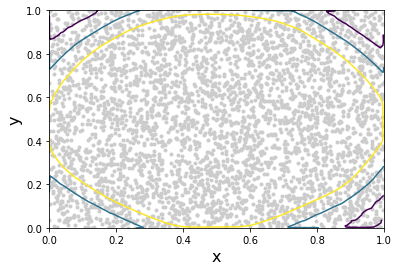

In [9]:
zgrid, lnLgrid = sw_list[-1].posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], (-lnLgrid+max_lnL)*2, levels = [1, 4, 9])
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim([0.0,1.0])
plt.ylim([-0.0, 1.0])
#plt.savefig('Figs/RingPos2d1.png',dpi=300)

In [43]:
np.random.seed(26)
torch.manual_seed(26)
z1 = np.array([0.2025, 0.4975,])
x1 = noisemodel(model(z1))

In [44]:
sw2_list = []

for i_round in range(1):
    parent = None if len(sw2_list) == 0 else sw2_list[-1]
    sw2 = swyft.SWYFT(x1, zdim = 2, device = DEVICE, head = None, datastore = ds, nsamples = 2000, noisemodel = noisemodel, parent = parent)
    sw2_list.append(sw2)
    
    if sw2.requires_sim():
        for i in ds.require_sim():
            z = ds.z[i]
            x = model(z)
            ds.add_sim(i, x)
            
    sw2.train1d(max_epochs = 100, nbatch = 16)

Constrained posterior area: 1.0
No new simulator runs required.
Start training
LR iteration 0
Total epochs: 9
Validation losses: [5.173694834113121, 4.948791727423668, 4.867143049836159, 4.936013713479042, 4.815803736448288, 4.801644131541252, 4.8063507080078125, 4.805671155452728, 4.834473796188831]
LR iteration 1
Total epochs: 5
Validation losses: [4.781448639929295, 4.739344522356987, 4.759565211832523, 4.766891486942768, 4.7647474855184555]
LR iteration 2
Total epochs: 4
Validation losses: [4.731529109179974, 4.738706350326538, 4.757753401994705, 4.7398611307144165]


In [ ]:
ds.__len__()

In [45]:
sw2_list[-1].trainNd([[0, 1]], max_epochs = 100, nbatch = 16)

Start training
LR iteration 0
Total epochs: 13
Validation losses: [2.3884212486445904, 2.089757990092039, 1.9773191660642624, 1.9973353259265423, 1.9032668508589268, 1.971926748752594, 1.9866999052464962, 1.8783095106482506, 1.886774756014347, 1.872894611209631, 1.890327412635088, 1.9688116237521172, 1.894190225750208]
LR iteration 1
Total epochs: 10
Validation losses: [1.8586562741547823, 1.8183595538139343, 1.8852570541203022, 1.7961296886205673, 1.8656699247658253, 1.8518721386790276, 1.794228233397007, 1.8169940747320652, 1.8221485149115324, 1.8899864554405212]
LR iteration 2
Total epochs: 6
Validation losses: [1.8152727335691452, 1.9450718145817518, 1.7668565418571234, 1.832902505993843, 1.8443711791187525, 1.8529494479298592]


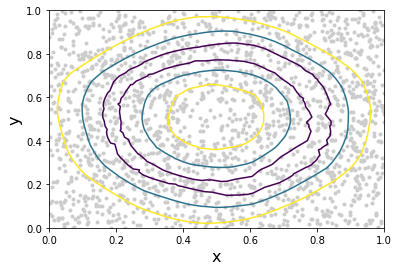

In [53]:
zgrid, lnLgrid = sw2_list[-1].posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], (-lnLgrid+max_lnL)*2, levels = [1, 4, 9])
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig('Figs/RingPos2d2.png',dpi=300)

In [47]:
torch.save(sw_list[-1].posterior([0,1]),'RingPost2d1.pt')
torch.save(sw2_list[-1].posterior([0,1]),'RingPost2d2.pt')

Constrained posterior area: 1.0
No new simulator runs required.
Start training
LR iteration 0
Total epochs: 9
Validation losses: [5.173694834113121, 4.948791727423668, 4.867143049836159, 4.936013713479042, 4.815803736448288, 4.801644131541252, 4.8063507080078125, 4.805671155452728, 4.834473796188831]
LR iteration 1
Total epochs: 5
Validation losses: [4.781448639929295, 4.739344522356987, 4.759565211832523, 4.766891486942768, 4.7647474855184555]
LR iteration 2
Total epochs: 4
Validation losses: [4.731529109179974, 4.738706350326538, 4.757753401994705, 4.7398611307144165]
Start training
LR iteration 0
Total epochs: 13
Validation losses: [2.3884212486445904, 2.089757990092039, 1.9773191660642624, 1.9973353259265423, 1.9032668508589268, 1.971926748752594, 1.9866999052464962, 1.8783095106482506, 1.886774756014347, 1.872894611209631, 1.890327412635088, 1.9688116237521172, 1.894190225750208]
LR iteration 1
Total epochs: 10
Validation losses: [1.8586562741547823, 1.8183595538139343, 1.88525705

(0.0, 1.0)

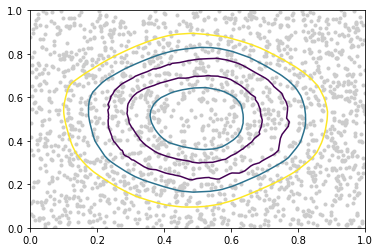

In [48]:
np.random.seed(26)
torch.manual_seed(26)
z2 = np.array([0.6, 0.3])
x2 = noisemodel(model(z2))

sw3_list = []

for i_round in range(1):
    parent = None if len(sw3_list) == 0 else sw3_list[-1]
    sw3 = swyft.SWYFT(x2, zdim = 2, device = DEVICE, head = None, datastore = ds, nsamples = 2000, noisemodel = noisemodel, parent = parent)
    sw3_list.append(sw3)
    
    if sw3.requires_sim():
        for i in ds.require_sim():
            z = ds.z[i]
            x = model(z)
            ds.add_sim(i, x)
            
    sw3.train1d(max_epochs = 100, nbatch = 16)

sw3_list[-1].trainNd([[0, 1]], max_epochs = 100, nbatch = 16)

zgrid, lnLgrid = sw3_list[-1].posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], (-lnLgrid+max_lnL)*2, levels = [1, 4, 9])
plt.xlim([0, 1])
plt.ylim([0, 1])